In [1]:
import h5py
import numpy as np
import pylab
import numpy

In [2]:
f = h5py.File('../inj-t10-1p4spin0p9/runs/O3b/11/full_data/H1-HDF_TRIGGER_MERGE_FULL_DATA-1261583854-270805.hdf','r')

In [3]:
f

<HDF5 file "H1-HDF_TRIGGER_MERGE_FULL_DATA-1261583854-270805.hdf" (mode r)>

In [4]:
f.keys()

<KeysViewHDF5 ['H1']>

In [5]:
f['H1']

<HDF5 group "/H1" (30 members)>

In [6]:
f['H1'].keys()

<KeysViewHDF5 ['bank_chisq', 'bank_chisq_dof', 'bank_chisq_dof_template', 'bank_chisq_template', 'chisq', 'chisq_dof', 'chisq_dof_template', 'chisq_template', 'coa_phase', 'coa_phase_template', 'cont_chisq', 'cont_chisq_dof', 'cont_chisq_dof_template', 'cont_chisq_template', 'end_time', 'end_time_template', 'gating', 'psd_var_val', 'psd_var_val_template', 'search', 'sg_chisq', 'sg_chisq_template', 'sigmasq', 'sigmasq_template', 'snr', 'snr_template', 'template_boundaries', 'template_duration', 'template_duration_template', 'template_id']>

In [7]:
#bankchisq = f['H1']['bank_chisq'][:]

In [8]:
def snr_from_chisq(chisq, newsnr, q=6.):
    snr = numpy.zeros(len(chisq)) + float(newsnr)
    ind = numpy.where(chisq > 1.)[0]
    snr[ind] = float(newsnr) / ( 0.5 * (1. + chisq[ind] ** (q/2.)) ) ** (-1./q)
    return snr

newsnr_contours = [5,7,9,11,13]

(0.5, 66.0)

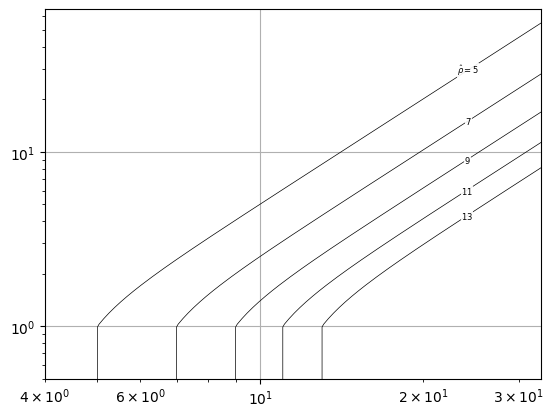

In [9]:
fig = pylab.figure(1)

r = numpy.logspace(numpy.log(0.5), numpy.log(60), 300)
for i, cval in enumerate(newsnr_contours):
    snrv = snr_from_chisq(r, cval)
    pylab.plot(snrv, r, color='black', lw=0.5)
    if i == 0:
        label = "$\\hat{\\rho} = %s$" % cval
    else:
        label = "$%s$" % cval
    try:
        label_pos_idx = numpy.where(snrv > 30 * 0.8)[0][0]
    except IndexError:
        label_pos_idx = 0
    pylab.text(snrv[label_pos_idx], r[label_pos_idx], label, fontsize=6,
               horizontalalignment='center', verticalalignment='center',
               bbox=dict(facecolor='white', lw=0, pad=0, alpha=0.9))

ax = pylab.gca()
pylab.grid()   
ax.set_xscale('log')
ax.set_yscale('log')
pylab.xlim(4, 30 * 1.1)
pylab.ylim(0.5, 60 * 1.1)

In [10]:
from pycbc.events import ranking

In [12]:
ranking.sngls_ranking_function_dict

{'snr': <function pycbc.events.ranking.get_snr(trigs)>,
 'newsnr': <function pycbc.events.ranking.get_newsnr(trigs)>,
 'new_snr': <function pycbc.events.ranking.get_newsnr(trigs)>,
 'newsnr_sgveto': <function pycbc.events.ranking.get_newsnr_sgveto(trigs)>,
 'newsnr_sgveto_psdvar': <function pycbc.events.ranking.get_newsnr_sgveto_psdvar(trigs)>,
 'newsnr_sgveto_psdvar_threshold': <function pycbc.events.ranking.get_newsnr_sgveto_psdvar_threshold(trigs)>,
 'newsnr_sgveto_psdvar_scaled': <function pycbc.events.ranking.get_newsnr_sgveto_psdvar_scaled(trigs)>,
 'newsnr_sgveto_psdvar_scaled_threshold': <function pycbc.events.ranking.get_newsnr_sgveto_psdvar_scaled_threshold(trigs, threshold=2.0)>,
 'newsnr_exp': <function pycbc.events.ranking.get_newsnr_exp(trigs, chisq_cut=2.0, sg_chisq_cut=4.0)>}